In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Ignore deprecation warnings

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

from brent import brent
from newton_raphson import newton_raphson

## Solving equation

### Function

$f(R_{eq}) = - \frac{t}{C \log \left ( \frac{v - I_h R_{eq}}{v_0 - I_h R_{eq}} \right )} - R_{eq}$

### Derivative

$f'(R_{eq}) = \frac{t I_h (v - v_0)}{C (v - I_h R_{eq}) (v_0-I_h R_{eq}) (\log u)^2} - 1$

where $u = \frac{v - I_h R_{eq}}{v_0 - I_h R_{eq}}$.

In [4]:
def equation(R_eq, v, v_0, I_h, C, t):
    return -(t / (C * math.log((v - I_h * R_eq) / (v_0 - I_h * R_eq)))) - R_eq

def derivative(R_eq, v, v_0, I_h, C, t):
    # use the real derivative of the function `equation`
    return t * I_h * (v - v_0) / (C * (v - I_h * R_eq) * (v_0 - I_h * R_eq) * math.log((v - I_h * R_eq) / (v_0 - I_h * R_eq)) ** 2) - 1

def derivative_approx(R_eq, v, v_0, I_h, C, t,
                      h = 1e-6,  # Small perturbation
                      ):
    # uses a numerical approximation of the derivative of `equation`
    return (equation(R_eq + h, v, v_0, I_h, C, t) - equation(R_eq, v, v_0, I_h, C, t)) / h

## Test methods

In [5]:
# Parameters given
v, v_0 = 3.0, 5.0
I_h = 0.01
C = 2.5
t = 1.0
# initial guess
R_eq_guess = 5.0

In [6]:
solution = newton_raphson(equation, derivative, R_eq_guess, args=(v, v_0, I_h, C, t))
print("Newton-Raphson Solution:", solution)

Newton-Raphson Solution: 0.7814488246888024


In [7]:
# find solution using brent's method (see source code for more info)
bsolution = brent(equation, 0, R_eq_guess, args=(v, v_0, I_h, C, t))
print("Brent's solution", bsolution)

Brent's solution 0.7814484387263225


In [8]:
# find the solution using scipy.fsolve (for comparison)
root = fsolve(equation, R_eq_guess, args=(v, v_0, I_h, C, t))
print("Fsolve solution:", root.item())

Fsolve solution: 0.7814488246888027


# Plot equation vs Req using the parameters

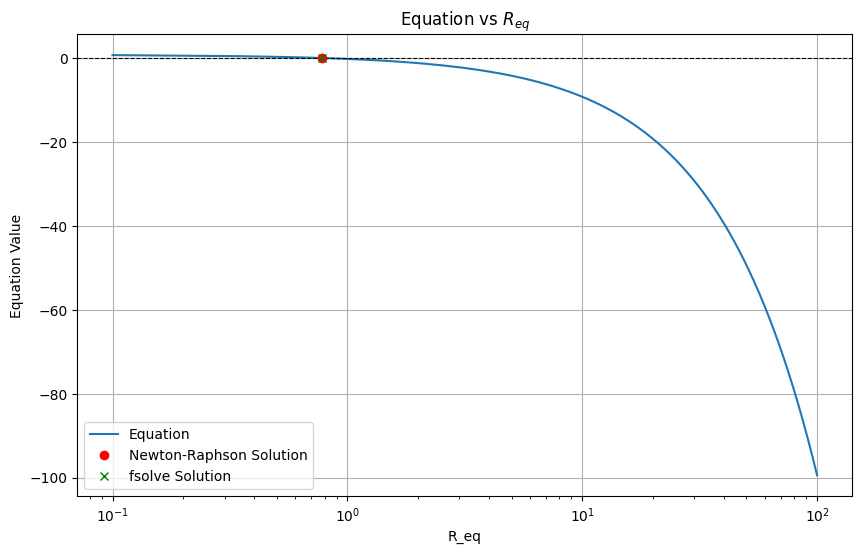

In [10]:
# Generate a range of R_eq values
r_eq_values = np.linspace(0.1, 100.0, 400)  # Adjust the range as needed

# Calculate the equation values for each R_eq
equation_values = [equation(r, v, v_0, I_h, C, t) for r in r_eq_values]

# Plot the equation vs R_eq
plt.figure(figsize=(10, 6))
plt.plot(r_eq_values, equation_values, label='Equation')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)  # Add a horizontal line at y=0 to show roots
if solution is not None:
    plt.plot(solution, equation(solution, v, v_0, I_h, C, t), 'ro', label='Newton-Raphson Solution')
if root is not None and len(root) > 0:
     plt.plot(root[0], equation(root[0], v, v_0, I_h, C, t), 'gx', label='fsolve Solution')
plt.xlabel('R_eq')
plt.ylabel('Equation Value')
plt.title('Equation vs $R_{eq}$')
plt.grid(True)
plt.legend()
plt.xscale('log')
# plt.ylim(-10, 10) # Adjust y-limits for better visualization if needed
plt.show()
